Projecto final

Dataset: https://portal.brain-map.org/atlases-and-data/rnaseq/human-multiple-cortical-areas-smart-seq

Se uso la tabla de metadata de células para describir el tipo celular (Glutamatergica, gabaergica, no neuronal(Glia))

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.tree import plot_tree
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Dropout



In [2]:
metadata = pd.read_csv("metadata.csv")
metadata

,sample_name,exp_component_name,specimen_type,cluster_color,cluster_order,cluster_label,class_color,class_order,class_label,subclass_color,...,cell_type_alt_alias_order,cell_type_alt_alias_label,cell_type_designation_color,cell_type_designation_order,cell_type_designation_label,external_donor_name_color,external_donor_name_order,external_donor_name_label,outlier_call,outlier_type
0,F2S4_160113_027_A01,LS-15005h_S01_E1-50,nucleus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,#3DCC3D,2,H200.1025,True,Outlier L1-3 SST OR2AD1P
1,F2S4_160113_027_B01,LS-15005h_S02_E1-50,nucleus,#E170FE,32.0,Inh L2-5 VIP TOX2,#0066FF,4.0,GABAergic,#996517,...,32.0,NaN,#E170FE,32.0,Neuron 032,#3DCC3D,2,H200.1025,False,NaN
2,F2S4_160113_027_C01,LS-15005h_S03_E1-50,nucleus,#8E5864,2.0,Inh L1 LAMP5 GGT8P,#0066FF,4.0,GABAergic,#FF7373,...,2.0,NaN,#8E5864,2.0,Neuron 002,#3DCC3D,2,H200.1025,False,NaN
3,F2S4_160113_027_D01,LS-15005h_S04_E1-50,nucleus,#8B5862,1.0,Inh L1 LAMP5 NDNF,#0066FF,4.0,GABAergic,#FF7373,...,1.0,NaN,#8B5862,1.0,Neuron 001,#3DCC3D,2,H200.1025,False,NaN
4,F2S4_160113_027_E01,LS-15005h_S05_E1-50,nucleus,#CF6EC9,34.0,Inh L1-3 VIP ZNF322P1,#0066FF,4.0,GABAergic,#996517,...,34.0,NaN,#CF6EC9,34.0,Neuron 034,#3DCC3D,2,H200.1025,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49412,F2S4_190227_100_C01,SM-GE4QU_S187_E1-50,nucleus,#312E27,111.0,Astro L1-6 FGFR3 ETNPPL,#17994B,3.0,Non-neuronal,#73ABFF,...,111.0,NaN,#312E27,111.0,Non-neuron 001,#3DCC3D,2,H200.1025,False,NaN
49413,F2S4_190227_100_E01,SM-GE4QU_S189_E1-50,nucleus,#BFC124,75.0,Exc L6 THEMIS LINC00343,#AFCC3D,2.0,Glutamatergic,#52FF26,...,75.0,NaN,#BFC124,75.0,Neuron 075,#3DCC3D,2,H200.1025,False,NaN
49414,F2S4_190227_100_F01,SM-GE4QU_S190_E1-50,nucleus,#8B5862,1.0,Inh L1 LAMP5 NDNF,#0066FF,4.0,GABAergic,#FF7373,...,1.0,NaN,#8B5862,1.0,Neuron 001,#3DCC3D,2,H200.1025,False,NaN
49415,F2S4_190227_100_G01,SM-GE4QU_S191_E1-50,nucleus,#71AF9A,116.0,Oligo L4-6 OPALIN,#17994B,3.0,Non-neuronal,#311799,...,116.0,NaN,#71AF9A,116.0,Non-neuron 006,#3DCC3D,2,H200.1025,False,NaN


In [3]:
features = ["region_label", "cortical_layer_label", "subclass_label", "donor_sex_label"]  # 4 entradas
target = "class_label"

In [4]:
df = metadata[features + [target]].dropna()


In [5]:
X = pd.get_dummies(df[features])
y = LabelEncoder().fit_transform(df[target])

In [6]:
le = LabelEncoder()
y = le.fit_transform(df["class_label"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

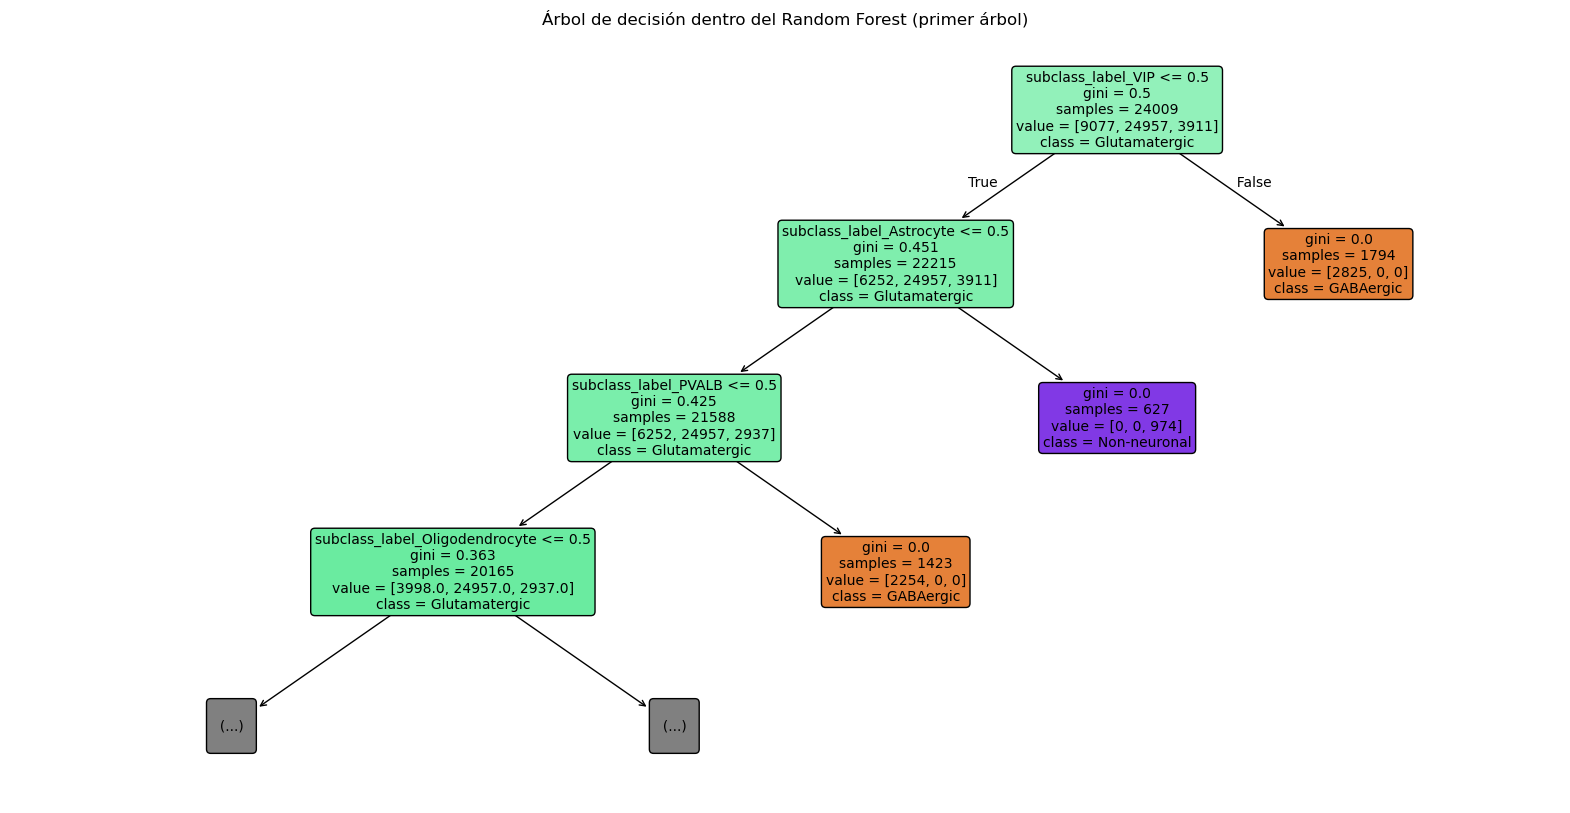

In [8]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

primer_arbol = rf_model.estimators_[0]  # Selecciona el primer árbol
feature_names = X.columns.tolist()      # Usa los nombres de las variables

plt.figure(figsize=(20, 10))
plot_tree(primer_arbol,
          feature_names=feature_names,
          class_names=le.classes_,
          filled=True,
          rounded=True,
          max_depth=3,  # Puedes subir esto a 4-5 si quieres más detalle
          fontsize=10)

plt.title("Árbol de decisión dentro del Random Forest (primer árbol)")
plt.show()



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      6256
           2       1.00      1.00      1.00       921

    accuracy                           1.00      9487
   macro avg       1.00      1.00      1.00      9487
weighted avg       1.00      1.00      1.00      9487



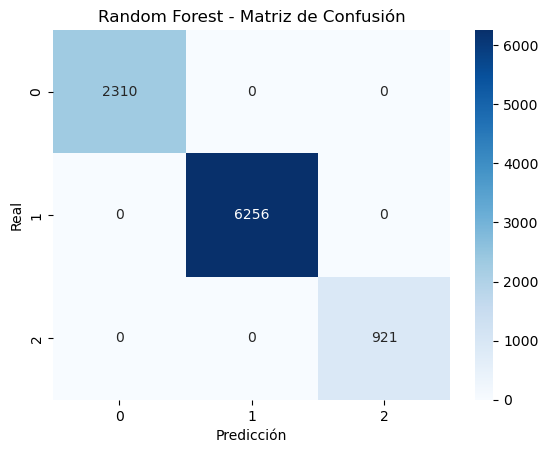

In [9]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


In [10]:
!pip install pydot
!pip install graphviz



Epoch 1/10
949/949 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.8816 - loss: 0.3320 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 2/10
949/949 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - accuracy: 0.9998 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 1.6299e-04
Epoch 3/10
949/949 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 4.6277e-05
Epoch 4/10
949/949 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - accuracy: 1.0000 - loss: 4.3467e-04 - val_accuracy: 1.0000 - val_loss: 1.5139e-05
Epoch 5/10
949/949 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - accuracy: 0.9999 - loss: 5.3636e-04 - val_accuracy: 1.0000 - val_loss: 6.4068e-06
Epoch 6/10
949/949 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 1.0000 - loss: 1.0775e-04 - val_accuracy: 1.0000 - val_loss: 2.7663e-06
Epoch 7/10
949/949 ━━━━━━━━━━━━━━━━━━━━ 1s 561us/step - accuracy: 1.0000 - loss: 7.2976e-05 - val_accuracy: 1.0000 - val_loss: 1.2729e-06
Epoch 8/10
949/949 ━━━━━━━━━━━━━━━━━━━━ 1s 576us/s

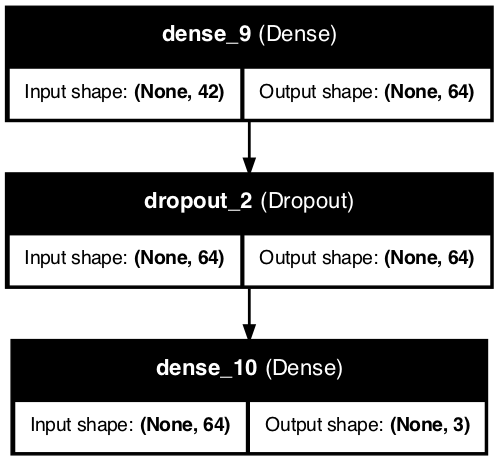

297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step


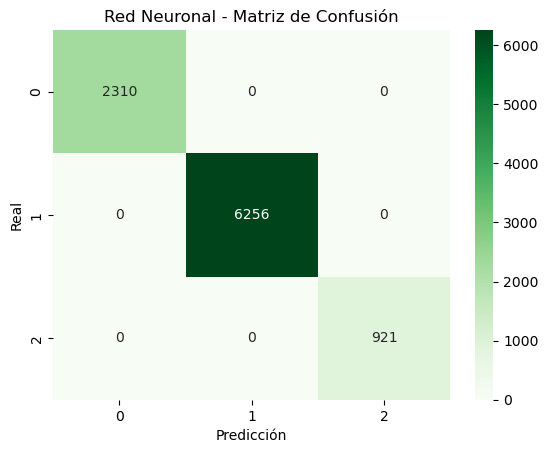

Red Neuronal - Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      6256
           2       1.00      1.00      1.00       921

    accuracy                           1.00      9487
   macro avg       1.00      1.00      1.00      9487
weighted avg       1.00      1.00      1.00      9487



In [24]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Crear el modelo
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),     
    Dense(64, activation='relu'),
    Dropout(0.3),                                 
    Dense(3, activation='softmax')                
])

# Compilar
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar
history = model.fit(X_train_scaled, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar
loss, accuracy = model.evaluate(X_test_scaled, y_test_cat)
print(f"ANN Accuracy en prueba: {accuracy:.2f}")

# Visualizar arquitectura del modelo
plot_model(model, show_shapes=True, show_layer_names=True, to_file="modelo_ANN.png", dpi=100)
display(Image("modelo_ANN.png"))

# Predicciones
y_pred_ann = model.predict(X_test_scaled).argmax(axis=1)

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred_ann), annot=True, fmt='d', cmap='Greens')
plt.title("Red Neuronal - Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Reporte de clasificación
print("Red Neuronal - Reporte de clasificación:")
print(classification_report(y_test, y_pred_ann))

El proyecto uso tanto redes neuronales como random forest, para saber el tipo de neuronas segun la metadata de su trasncriptimica, los medelos sin saber la categoria pudieron saber al 100% ambos el tipo de neuronas con metricas f1, acurracy recall perfectas. El dataset usa más de 10 mil células por lo que es un exito rotundo del modelo